In [170]:
from pmap import *
import numpy as np

In [171]:
%matplotlib notebook

In [172]:
from mpl_toolkits.basemap import Basemap, shiftgrid

In [173]:
import matplotlib.pyplot as plt

In [174]:
import pandas

In [216]:
u=getmap('/mnt/hyfluxVM/storage/tmp/1000270/1-1-calc/run6/work/u10max00043200.map')

In [217]:
m=np.ma.masked_array(u.data, u.data == u.nan)

In [218]:
lon=u.XSTART+np.arange(u.NCOLS)*u.CELLSIZE

In [219]:
lat=u.YSTART-np.arange(u.NROWS)*u.CELLSIZE

<IPython.core.display.Javascript object>


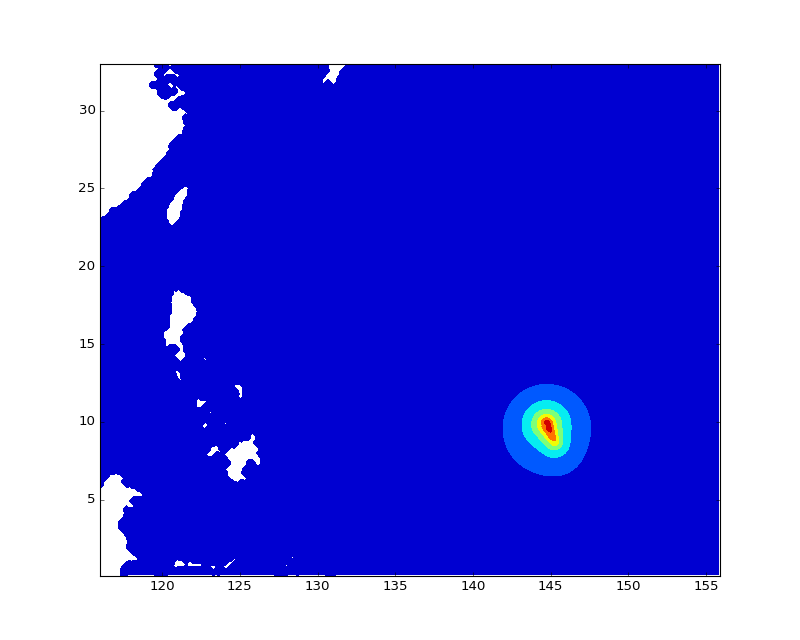

In [220]:
plt.figure(figsize=(10,8))
plt.contourf(lon,lat,m, clevs=20)
plt.show()

In [180]:
lons,lats=np.meshgrid(lon,lat)

In [181]:
mp = Basemap(projection='cyl',llcrnrlat=lat.min(),urcrnrlat=lat.max(),\
             llcrnrlon=lon.min(),urcrnrlon=lon.max(),resolution='l')


In [182]:
xx,yy=mp(lons,lats)

In [183]:
parallels = np.arange(-90.,90,20.)
meridians = np.arange(0.,360.,20.)

<IPython.core.display.Javascript object>


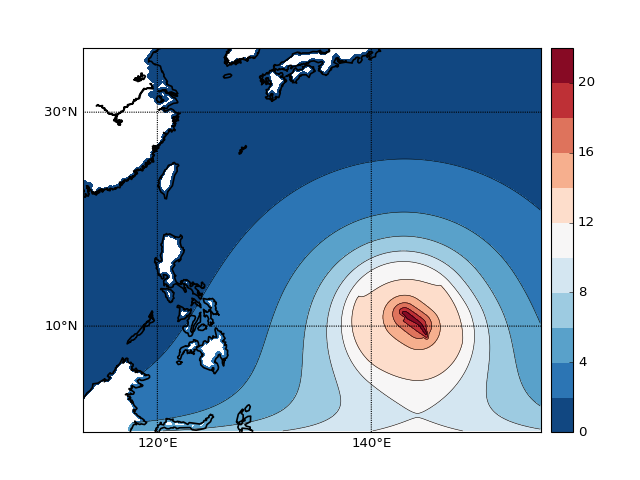

In [210]:
plt.figure()
CS1 = mp.contour(xx,yy,m,10,linewidths=0.5,colors='k',animated=True)
CS2 = mp.contourf(xx,yy,m,10,cmap=plt.cm.RdBu_r,animated=True)
mp.drawcoastlines(linewidth=1.5)
mp.drawparallels(parallels, labels=[1,0,0,1])
mp.drawmeridians(meridians, labels=[1,0,0,1])
cb = mp.colorbar(CS2,"right", size="5%", pad="2%")
plt.show()

In [203]:
def hvel2d(l1,l2,vtx,vty):
    r=np.sqrt(l1**2+l2**2)
    xh=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
        
    ur=(bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**xh
    
    theta=np.arctan2(l2,l1)
    ux=-ur*np.sin(theta)
    uxs=ux+vtx*(1.-np.exp(-(rmax0/r)**b0))
    uy=ur*np.cos(theta)
    uys=uy+vty*(1.-np.exp(-(rmax0/r)**b0))

    utot = np.sqrt(ux**2+uy**2)
    return utot,ux,uy,uxs,uys, pres(r)

In [187]:
def pres(r):
    return pch+dph*np.exp(-(rmaxh/r)**bh)

In [188]:
from math import radians, cos, sin, asin, sqrt
def Haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6378.388 * c
    return  km



In [221]:
inpfile = '/mnt/hyfluxVM/storage/tmp/1000270/1-1-calc/run6/hollandData.txt'

In [222]:
inpdat=pandas.read_csv(inpfile,header=0,delimiter='\t',usecols=np.arange(0,16))
inpdat

,time,timemin,timesec,bul,forecast,xhc,yhc,vmax,vmax0,b,k,rmax,deltap,vtrx,vtry,catWind
0,0,0,0,1,0,145.2,8.7,12.860,8.72356,1.200000,0.000000,20000.0,430.817,-1.27366,2.83464,-1
1,12,720,43200,1,1,144.7,9.8,18.004,11.89850,1.200000,0.000000,20000.0,844.402,-2.79328,3.73657,0
2,24,1440,86400,1,1,143.0,11.6,23.148,18.88570,0.848711,0.122111,33345.8,1313.700,-5.17483,4.76733,0
3,36,2160,129600,1,1,140.6,13.5,28.292,27.16130,0.961604,0.118947,18015.9,2398.270,-6.51492,4.76735,0
4,48,2880,172800,1,1,137.8,15.3,33.436,27.28930,1.003610,0.124214,22702.7,2319.590,-7.28138,4.80756,1
5,72,4320,259200,1,1,131.7,19.2,46.296,34.70070,0.903516,0.056349,15070.8,4166.130,-7.02789,4.90162,2
6,96,5760,345600,1,1,126.7,22.7,54.012,43.49840,0.903516,0.056349,15070.8,10093.400,-4.67251,4.06402,3
7,120,7200,432000,1,1,124.1,25.5,48.868,40.94250,0.903516,0.056349,15070.8,8262.390,-2.17370,3.37690,2


In [223]:
inpdat.columns = inpdat.columns.str.strip() # strip whitespace from headers

In [224]:
maxR=500.e3  # maximum radius of TC [m] (500Km)

In [225]:
rhoa=1.15 #air density  Kg/m^3

In [226]:
pn=101000.  # Atmospheric pressure [N/m^2] (101KPa - enviromental pressure)

In [227]:
rmax0=20000 # eq (14)
b0=1.5 

In [261]:
bul=2

In [262]:
bh=inpdat['b'][bul]
vmaxh=inpdat['vmax'][bul]
kh=inpdat['k'][bul]
rmaxh=inpdat['rmax'][bul]
dph=inpdat['deltap'][bul]
vtrx=inpdat['vtrx'][bul]
vtry=inpdat['vtry'][bul]
xhc=inpdat['xhc'][bul]
yhc=inpdat['yhc'][bul]
pch=pn-dph


In [263]:
utot=[]
p=[]
for a, b in zip(xx.ravel(),yy.ravel()):
    l1=Haversine(a, yhc, xhc, yhc)*1000 # in m
    l2=Haversine(xhc, b, xhc, yhc)*1000 # in m
    ut,ux,uy,uxs,uys,pe = hvel2d(l1,l2,vtrx,vtry)
    utot.append(ut)
    p.append(pe)

In [264]:
uc=np.array(utot).reshape(xx.shape)

In [265]:
pc=np.array(p).reshape(xx.shape)

<IPython.core.display.Javascript object>


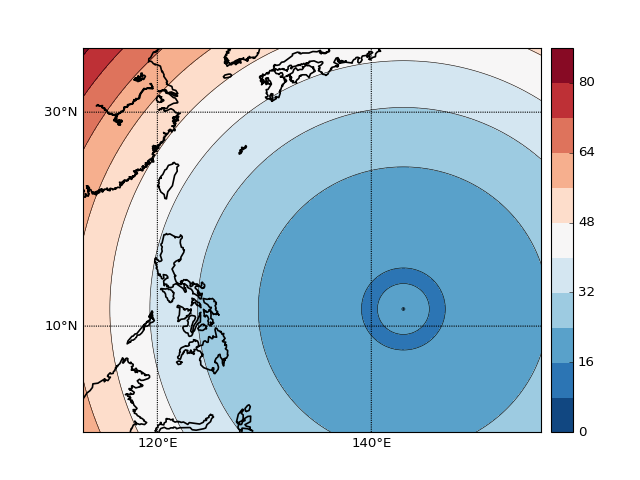

In [266]:
plt.figure()
CS1 = mp.contour(xx,yy,uc,10,linewidths=0.5,colors='k',animated=True)
CS2 = mp.contourf(xx,yy,uc,10,cmap=plt.cm.RdBu_r,animated=True)
mp.drawcoastlines(linewidth=1.5)
mp.drawparallels(parallels,labels=[1,0,0,1])
mp.drawmeridians(meridians,labels=[1,0,0,1])
cb = mp.colorbar(CS2,"right", size="5%", pad="2%")
plt.show()

<IPython.core.display.Javascript object>


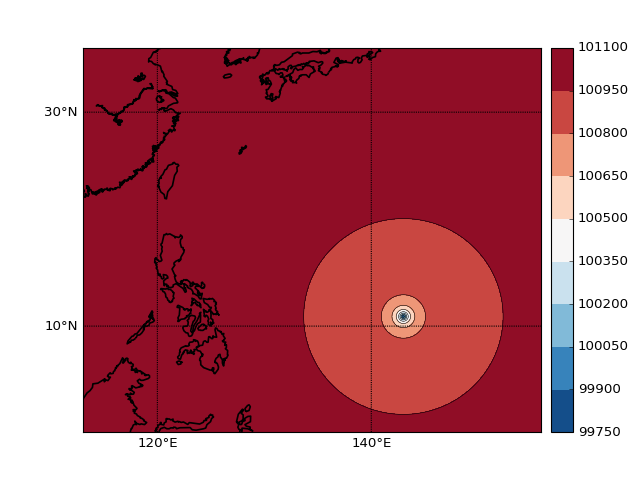

In [201]:
plt.figure()
CS1 = mp.contour(xx,yy,pc,10,linewidths=0.5,colors='k',animated=True)
CS2 = mp.contourf(xx,yy,pc,10,cmap=plt.cm.RdBu_r,animated=True)
mp.drawcoastlines(linewidth=1.5)
mp.drawparallels(parallels,labels=[1,0,0,1])
mp.drawmeridians(meridians,labels=[1,0,0,1])
cb = mp.colorbar(CS2,"right", size="5%", pad="2%")
plt.show()

In [252]:
uc=0.
pc=0.

In [253]:
for bul in range(3):
    bh=inpdat['b'][bul]
    vmaxh=inpdat['vmax'][bul]
    kh=inpdat['k'][bul]
    rmaxh=inpdat['rmax'][bul]
    dph=inpdat['deltap'][bul]
    vtrx=inpdat['vtrx'][bul]
    vtry=inpdat['vtry'][bul]
    xhc=inpdat['xhc'][bul]
    yhc=inpdat['yhc'][bul]
    pch=pn-dph

    utot=[]
    p=[]
    for a, b in zip(xx.ravel(),yy.ravel()):
     l1=Haversine(a, yhc, xhc, yhc)*1000 # in m
     l2=Haversine(xhc, b, xhc, yhc)*1000 # in m
     ut,ux,uy,uxs,uys,pe = hvel2d(l1,l2,vtrx,vtry)
     utot.append(ut)
     p.append(pe)
    
    uc=uc+np.array(utot).reshape(xx.shape)
    pc=pc+np.array(p).reshape(xx.shape)

<IPython.core.display.Javascript object>


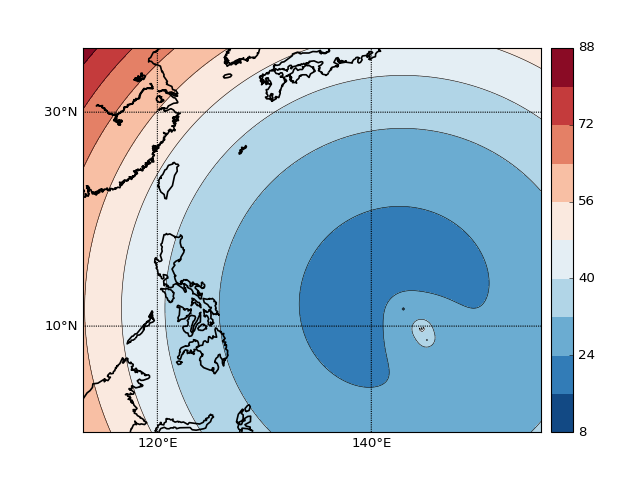

In [254]:
plt.figure()
CS1 = mp.contour(xx,yy,uc,10,linewidths=0.5,colors='k',animated=True)
CS2 = mp.contourf(xx,yy,uc,10,cmap=plt.cm.RdBu_r,animated=True)
mp.drawcoastlines(linewidth=1.5)
mp.drawparallels(parallels,labels=[1,0,0,1])
mp.drawmeridians(meridians,labels=[1,0,0,1])
cb = mp.colorbar(CS2,"right", size="5%", pad="2%")
plt.show()

<IPython.core.display.Javascript object>


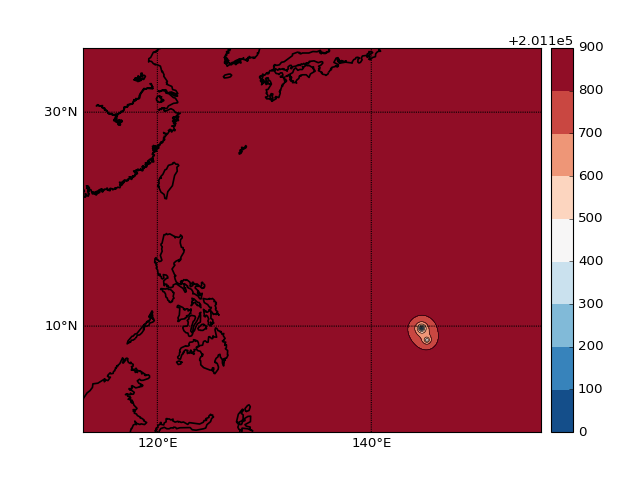

In [250]:
plt.figure()
CS1 = mp.contour(xx,yy,pc,10,linewidths=0.5,colors='k',animated=True)
CS2 = mp.contourf(xx,yy,pc,10,cmap=plt.cm.RdBu_r,animated=True)
mp.drawcoastlines(linewidth=1.5)
mp.drawparallels(parallels,labels=[1,0,0,1])
mp.drawmeridians(meridians,labels=[1,0,0,1])
cb = mp.colorbar(CS2,"right", size="5%", pad="2%")
plt.show()